In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

In [4]:
import networkx as nx
graph=nx.generators.geometric.random_geometric_graph(100, 0.35)

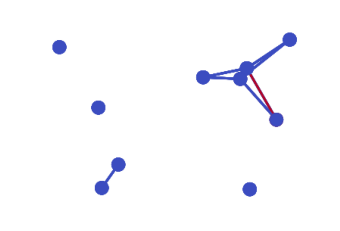

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
import time
import rl_routing
from IPython.display import clear_output

def draw_output(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

env = rl_routing.NetworkEnv(graph=graph)
env.create_packets(n=1)
for _ in range(100):
    if env.done():
        env.create_packets(n=1)
        continue
        break
    env.step()
    img = env.render()
    draw_output(img)
    time.sleep(1000/1000)
    clear_output(wait=True)
draw_output(env.render())
print("Done!")